# Test the ReadSTAC class

In this Notebook, the methods of the ReadSTAC class are explored and tested. 

The main purposes and functions of the class are: 
1. Read a STAC API to obtain metadata
2. Download data using the ``stackstac`` library, allowing for direct further processing of the data as ``xarray.DataArray`` objects. With this approach, a small area of interest can be defined before downloading the data, making it more efficient and faster than downloading whole tiles. 
3. Downloading whole tiles as GeoTIFFs and VRTs. 

## Setup

In [1]:
import sys
sys.path.append('..')

import os
print(os.getcwd())

from src.get_sentinel_images import ReadSTAC

/workspaces/mine-segmentation/notebooks


## 1. Read STAC API to obtain metadata

In [2]:
stac_reader = ReadSTAC()

# check available items
items = stac_reader.get_items(
    location = [10, 10],
    buffer=10,
    timerange='2021-01-01/2021-01-15',
    max_cloud_cover=10
)
items

12 Items found.


Loading a particular item, either the least cloudy or the most recent in the area of interest:

In [3]:
least_cloudy_item = stac_reader.filter_item(items, "least_cloudy")
most_recent_item = stac_reader.filter_item(items, "most_recent")

Choosing S2A_MSIL2A_20210114T094341_R036_T32PPS_20210115T123017 from 2021-01-14 with 0.002921% cloud cover
Choosing S2A_MSIL2A_20210114T094341_R036_T32PPS_20210115T123017 from 2021-01-14 with 0.002921% cloud cover


Preview the tile: 

Asset Key                            Description
0                  AOT        Aerosol optical thickness (AOT)
1                  B01         Band 1 - Coastal aerosol - 60m
2                  B02                    Band 2 - Blue - 10m
3                  B03                   Band 3 - Green - 10m
4                  B04                     Band 4 - Red - 10m
5                  B05   Band 5 - Vegetation red edge 1 - 20m
6                  B06   Band 6 - Vegetation red edge 2 - 20m
7                  B07   Band 7 - Vegetation red edge 3 - 20m
8                  B08                     Band 8 - NIR - 10m
9                  B09             Band 9 - Water vapor - 60m
10                 B11             Band 11 - SWIR (1.6) - 20m
11                 B12             Band 12 - SWIR (2.2) - 20m
12                 B8A  Band 8A - Vegetation red edge 4 - 20m
13                 SCL          Scene classfication map (SCL)
14                 WVP                     Water vapour (WVP)
15              visual                       True color image
16             preview                              Thumbnail
17       safe-manifest                          SAFE manifest
18    granule-metadata                       Granule metadata
19    inspire-metadata                       INSPIRE metadata
20    product-metadata                       Product metadata
21  datastrip-metadata                     Datastrip metadata
22            tilejson        TileJSON with default rendering
23    rendered_preview                       Rendered preview

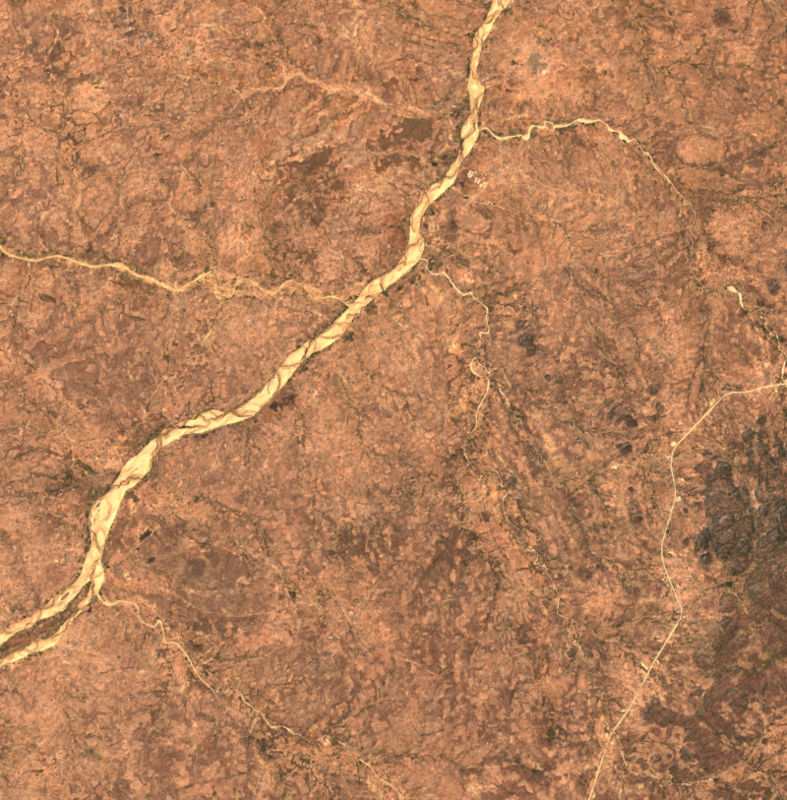

In [4]:
table, image = stac_reader.preview_item(least_cloudy_item)
display(table)
image.show()

## 2. Downloading data using the stackstac library
The stackstac library facilitates lazy-load, i.e. the data is only loaded at the end when requested. 

### Get the stack item of only the area of interest defined in the class above
We can get multiple items in a single stack: 

In [5]:
# TODO: Fix this
stack = stac_reader.get_stack(items)
stack

AttributeError: 'ItemCollection' object has no attribute 'properties'

Or we can filter for one single item: 

In [6]:
stack = stac_reader.get_stack(items, filter_by="least_cloudy")
stack

Choosing S2A_MSIL2A_20210114T094341_R036_T32PPS_20210115T123017 from 2021-01-14 with 0.002921% cloud cover


/opt/venv/lib/python3.12/site-packages/stackstac/prepare.py:408: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(


<xarray.DataArray 'stackstac-c9983fc184aec1fc732fa5371bcb8608' (band: 3,
                                                                y: 2000, x: 2000)> Size: 96MB
dask.array<getitem, shape=(3, 2000, 2000), dtype=float64, chunksize=(1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/46)
    time                                     datetime64[ns] 8B 2021-01-14T09:...
    id                                       <U54 216B 'S2A_MSIL2A_20210114T0...
  * band                                     (band) <U3 36B 'B02' 'B03' 'B04'
  * x                                        (x) float64 16kB 5.996e+05 ... 6...
  * y                                        (y) float64 16kB 1.116e+06 ... 1...
    eo:cloud_cover                           float64 8B 0.002921
    ...                                       ...
    proj:shape                               object 8B {10980}
    proj:bbox                                object 8B {600000.0, 1090200.0, ...
    common_name                              (band) <U5 60B 'blue' 'green' 'red'
    center_wavelength                        (band) float64 24B 0.49 0.56 0.665
    full_width_half_max                      (band) float64 24B 0.098 ... 0.038
    epsg                                     int64 8B 32632
Attributes:
    spec:        RasterSpec(epsg=32632, bounds=(599600, 1095580, 619600, 1115...
    crs:         epsg:32632
    transform:   | 10.00, 0.00, 599600.00|\n| 0.00,-10.00, 1115580.00|\n| 0.0...
    resolution:  10

### Enhance contrast by stretching

In [7]:
stack = stac_reader.get_stretched_stack(items, filter_by="least_cloudy")
stack

Choosing S2A_MSIL2A_20210114T094341_R036_T32PPS_20210115T123017 from 2021-01-14 with 0.002921% cloud cover


/opt/venv/lib/python3.12/site-packages/stackstac/prepare.py:408: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(


<xarray.DataArray 'stackstac-c9983fc184aec1fc732fa5371bcb8608' (band: 3,
                                                                y: 2000, x: 2000)> Size: 96MB
dask.array<setitem, shape=(3, 2000, 2000), dtype=float64, chunksize=(1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/46)
    time                                     datetime64[ns] 8B 2021-01-14T09:...
    id                                       <U54 216B 'S2A_MSIL2A_20210114T0...
  * band                                     (band) <U3 36B 'B02' 'B03' 'B04'
  * x                                        (x) float64 16kB 5.996e+05 ... 6...
  * y                                        (y) float64 16kB 1.116e+06 ... 1...
    eo:cloud_cover                           float64 8B 0.002921
    ...                                       ...
    proj:shape                               object 8B {10980}
    proj:bbox                                object 8B {600000.0, 1090200.0, ...
    common_name                              (band) <U5 60B 'blue' 'green' 'red'
    center_wavelength                        (band) float64 24B 0.49 0.56 0.665
    full_width_half_max                      (band) float64 24B 0.098 ... 0.038
    epsg                                     int64 8B 32632
Attributes:
    spec:        RasterSpec(epsg=32632, bounds=(599600, 1095580, 619600, 1115...
    crs:         epsg:32632
    transform:   | 10.00, 0.00, 599600.00|\n| 0.00,-10.00, 1115580.00|\n| 0.0...
    resolution:  10

We can show the stack item:

In [8]:
# stac_reader.display_stack_as_image(stack)

We can now save the stack as a GeoTIFF, to be used further downstream. 

In [9]:
stac_reader.save_stack_as_geotiff(stack, "testimage.tif")

/opt/venv/lib/python3.12/site-packages/dask/array/chunk.py:278: RuntimeWarning: invalid value encountered in cast
  return x.astype(astype_dtype, **kwargs)


## 3. Download full images 
We can download one band: 

In [6]:
stac_reader.download_band(
    item=least_cloudy_item, 
    band_name="blue",
    band_key="B02",
    )

Downloaded /workspaces/mine-segmentation/src/data/temp/S2A_MSIL2A_20210114T094341_R036_T32PPS_20210115T123017_blue.tif
